In [26]:
from typing import *
import os
from pathlib import Path
from datetime import datetime

import numpy as np
import pandas as pd
import swifter
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from tqdm.notebook import tqdm
from nptyping import NDArray, Shape, Int, Float
from rich import print as rprint

sns.set_style('whitegrid')
colors = ['#de3838', '#007bc3', '#ffd12a']
markers = ['o', 'x', ',']
%config InlineBackend.figure_formats = ['svg']

cmap = sns.diverging_palette(255, 0, as_cmap=True)  # カラーパレットの定義
DATA_DIR = Path()/'..'/'..'/'data'
DF_DIR = DATA_DIR/'dataframes'

/Users/jo/GitHub/knock_da/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# 1
df_customer_master = pd.read_csv(DATA_DIR/'customer_master.csv')
df_item_master = pd.read_csv(DATA_DIR/'item_master.csv')
df_transaction_1 = pd.read_csv(DATA_DIR/'transaction_1.csv')
df_transaction_detail_1 = pd.read_csv(DATA_DIR/'transaction_detail_1.csv')

display(df_customer_master.head(2))
display(df_item_master.head(2))
display(df_transaction_1.head(2))
display(df_transaction_detail_1.head(2))

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都


,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1


In [14]:
# 2

df_transaction_2 = pd.read_csv(DATA_DIR/'transaction_2.csv')
df_transaction = pd.concat([df_transaction_1, df_transaction_2], ignore_index=True)
display(df_transaction.head(2))
print(f'length of transaction_1: {len(df_transaction_1)}')
print(f'length of transaction_2: {len(df_transaction_2)}')
print(f'length of transaction: {len(df_transaction)}')

df_transaction_detail_2 = pd.read_csv(DATA_DIR/'transaction_detail_2.csv')
df_transaction_detail = pd.concat([df_transaction_detail_1, df_transaction_detail_2], ignore_index=True)
display(df_transaction_detail.head(2))
print(f'length of transaction_detail_1: {len(df_transaction_detail_1)}')
print(f'length of transaction_detail_2: {len(df_transaction_detail_2)}')
print(f'length of transaction_detail: {len(df_transaction_detail)}')

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019


length of transaction_1: 5000
length of transaction_2: 1786
length of transaction: 6786


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1


length of transaction_detail_1: 5000
length of transaction_detail_2: 2144
length of transaction_detail: 7144


In [21]:
# 3

columns = ['transaction_id', 'payment_date', 'customer_id']
df_join_data = pd.merge(df_transaction_detail, df_transaction[columns], on='transaction_id', how='left')
display(df_join_data.head(2))

print(f'length of transaction_detail: {len(df_transaction_detail)}')
print(f'length of transaction: {len(df_transaction)}')
print(f'length of join_data: {len(df_join_data)}')

df_join_data.to_pickle(DF_DIR/'join_data_k3.pkl')
# df_join_data.to_pickle(DF_DIR/'join_data_k3.pkl.bz2', compression='bz2')

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019


length of transaction_detail: 7144
length of transaction: 6786
length of join_data: 7144


In [25]:
# 4

df_join_data = pd.read_pickle(DF_DIR/'join_data_k3.pkl')
df_join_data = pd.merge(df_join_data, df_customer_master, on='customer_id', how='left')
df_join_data = pd.merge(df_join_data, df_item_master, on='item_id', how='left')
display(df_join_data.head(2))
print(f'length of join_data: {len(df_join_data)}')

df_join_data.to_pickle(DF_DIR/'join_data_k4.pkl')

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000


length of join_data: 7144


In [29]:
# 5

df_join_data = pd.read_pickle(DF_DIR/'join_data_k4.pkl')
df_join_data['price'] = df_join_data['quantity'] * df_join_data['item_price']
columns = ['price', 'quantity', 'item_price']
display(df_join_data[columns].head(5))

df_join_data.to_pickle(DF_DIR/'join_data_k5.pkl')

,price,quantity,item_price
0,210000,1,210000
1,50000,1,50000
2,120000,1,120000
3,210000,1,210000
4,170000,2,85000


In [31]:
# 6

df_join_data = pd.read_pickle(DF_DIR/'join_data_k5.pkl')
print(df_join_data['price'].sum() == df_transaction['price'].sum()) 

True


In [33]:
# 7

df_join_data = pd.read_pickle(DF_DIR/'join_data_k5.pkl')
display(df_join_data.isnull().sum())
display(df_join_data.describe())

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [39]:
# 8

df_join_data = pd.read_pickle(DF_DIR/'join_data_k5.pkl')
display(df_join_data.dtypes)
df_join_data['payment_date'] = pd.to_datetime(df_join_data['payment_date'])
df_join_data['payment_month'] = df_join_data['payment_date'].dt.strftime('%Y%m')
display(df_join_data[['payment_date', 'payment_month']])

display(df_join_data.groupby('payment_month').sum()['price'])

df_join_data.to_pickle(DF_DIR/'join_data_k8.pkl')

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
price                  int64
dtype: object

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902
...,...,...
7139,2019-07-31 21:20:44,201907
7140,2019-07-31 21:52:48,201907
7141,2019-07-31 23:35:25,201907
7142,2019-07-31 23:39:35,201907


payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

In [42]:
# 9

df_join_data = pd.read_pickle(DF_DIR/'join_data_k8.pkl')

display(df_join_data.groupby(['payment_month', 'item_name']).sum()[['price', 'quantity']])
display(pd.pivot_table(df_join_data, index='item_name', columns='payment_month', values=['price', 'quantity'], aggfunc='sum'))

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000
201907,25250000,28220000,19440000,26100000,71610000


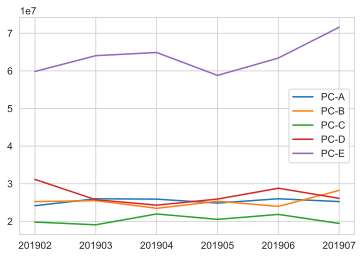

In [46]:
# 10

df_join_data = pd.read_pickle(DF_DIR/'join_data_k8.pkl')

graph_data = pd.pivot_table(df_join_data, index='payment_month', columns='item_name', values='price', aggfunc=sum)
display(graph_data)

for column in graph_data.columns:
    plt.plot(list(graph_data.index), graph_data[column], label=column)
plt.legend()
plt.show()